In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


**UNDERSTANDING OF THE PROBLEM STATEMENT:**
    
*   According to the quote, "Success in sales is the sum of small efforts, repeated day in & day out"
  
*   Let us consider a supermarket has several outlets or several stores around the world & they want us to predict the sales which they can expect.

**APPLICATION OF PREDICTING THE SALES:**
   
*    We can tell the company what are all the challenges they may face
   
*    What are the brands or products which is sold the most & other such kind of things
   
*    This helps sales team to understand which product to sell & which product to promote & other such kind of things
   
*    They can also make several marketing plans(let's say that a particular product in a particular store is getting sold the most & we may find some insights from it - as of why this product is getting sold the most & this helps the company to make better marketing decisions)
    


**IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**LOADING THE DATA**

In [3]:
# loading the data 
sales_data = pd.read_csv('Train.csv')
#checking the first 5 rows of the dataframe
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**It is important to note that Item_Outlet_Sales is the target variable which we are going to predict & the remaining are the feature variables**

In [4]:
# checking the number of data points(different products present in the dataset) & number of features
sales_data.shape

(8523, 12)

**Hence, we are having 8523 different products with 12 features**

In [5]:
# getting some information about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Categorical Features:**

* Item_Identifier : categories of different products

* Item_Fat_Content : It tells us whether it has high fat content or low fat content or 
  regular fat content

* Item_Type : It tells us whether it has meat or soft drink & such kind of things

* Outlet_Identifier : It tells us the unique ID of the outlet

* Outlet_Size : it tells us whether it is medium,high or small in size

* Outlet_Location_Type : It tells us whether it is tier 1 or tier 2 & such kind of things

* Outlet_Type : It tells us whether it is supermarket or grocerry store

In [6]:
# checking for missing values
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can observe that we are having 1463 missing values in the Item_Weight column & we are having about 2410 missing values in the Outlet_Size column

 
**IN ORDER TO DEAL WITH THE MISSING VALUES**

**Mean --> average**

* The Mean value of a dataset is the average value i.e. a number around which a whole data is spread out. All values used in calculating the average are weighted equally when defining the Mean

* In this case, in order to convert the missing values in the numerical column, we use mean of that particular column

**Mode --> most repeated value**

* The mode is the value that appears most frequently in a data set. A set of data may have one mode, more than one mode, or no mode at all.The mode can be the same value as the mean and/or median, but this is usually not the case.

* In this case, in order to convert the missing values in the categorical feature, we use the mode of that particular column

**Replacing the missing values in the "Item_Weight"column**

In [7]:
# mean value of "Item_Weight" column
sales_data['Item_Weight'].mean()

12.857645184136183

In [8]:
# filling the missing values in "Item_weight column" with "Mean" value
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)

**Replacing the missing values in the "Outlet_Size"column**

In [9]:
# mode of "Outlet_Size" column
sales_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [10]:
# filling the missing values in "Outlet_Size" column with Mode
#Here we take Outlet_Size column & Outlet_Type column since they are correlated
mode_of_Outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


From the above pivot table, we can observe that 

* If the outlet type is Grocery Store in most of the cases the outlet size(mode) is Small
* If the outlet type is Supermarket Type1 in most of the cases the outlet size(mode) is Small
* If the outlet type is Supermarket Type2 in most of the cases the outlet size(mode) is Medium
* If the outlet type is Supermarket Type3 in most of the cases the outlet size(mode) is Medium

In [12]:
miss_values = sales_data['Outlet_Size'].isnull()

In [13]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


**False** represents it is not null that means the **value is present**

**True** represents a particular **value is missing**

In [14]:
sales_data.loc[miss_values, 'Outlet_Size'] = sales_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [15]:
# checking for missing values
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Thus we don't have any missing values in a numerical column & a categorical column**

**ANALYSING THE DATA**

In [16]:
#stastical measures about the data
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**DATA VISUALIZATION**

* Data visualization is the graphical representation of information and data. 
* It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns 

**VISUALIZATION OF NUMERICAL FEATURES**

In [17]:
sns.set()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


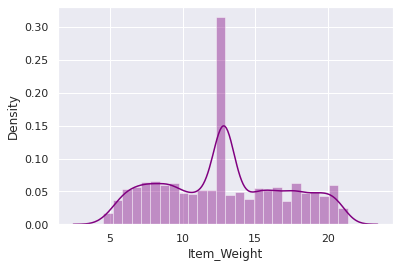

In [18]:
# Item_Weight distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Weight'], color='purple')
plt.show()

* Hence from the above graph we can observe that we have the item weight from 5 Kg to 20 Kg & we have maximum values around 12 Kg where the mean is 12.85 Kg

* Therefore in this 8523 products the average weight is about 12.8 Kg

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


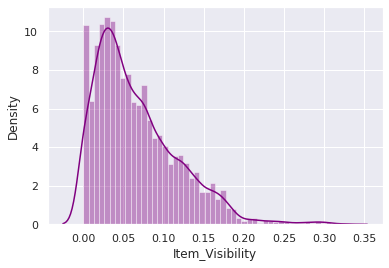

In [19]:
# Item Visibility distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Visibility'], color='purple')
plt.show()

* Hence from the above graph we can observe that Item_Visibility feature is positively skewed

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


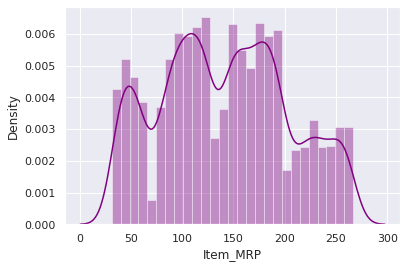

In [20]:
# Item MRP distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_MRP'], color='purple')
plt.show()

* From the above graph, we can observe that we have good amount of products for 50 MRP,  100 MRP ,200 MRP & then we have less products 

* Hence we have more products in the range of 100 MRP - 180 MRP

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


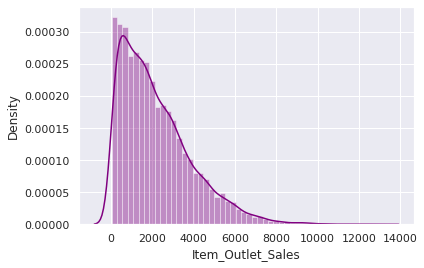

In [21]:
# Item_Outlet_Sales distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Outlet_Sales'], color='purple')
plt.show()

* Hence from the above graph we can observe that Item_Outlet_Sales feature is positively skewed

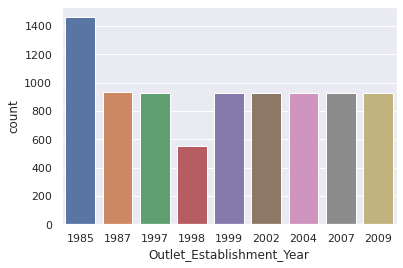

In [22]:
# Outlet_Establishment_Year column
#plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year', data=sales_data)
plt.show()

* Hence from the above graph we can observe that we have the outlet establishment from the year 1985, 1987 and all the way to 2009 

* Therefore these are the years on which different outlets or different stores have been established 

* We can also observe that a lots of stores are established in the year 1985 & less in the year 1998 & all the others years are almost same

**VISUALIZATION OF CATEGORICAL FEATURES**

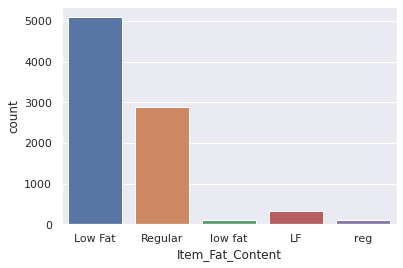

In [23]:
# Item_Fat_Content column
#plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=sales_data)
plt.show()

* From the above graph we can observe that the data in the Item_Fat_Content column has to be cleaned since we have columns such as Low fat,low fat & Lf which is same & must be put into a single particular label.Similarly we have Regular & reg where we need to put this into a single entity.

* Hence, we need to pre process this data so we will be dealing with this in a later point of time after the visualization of the data

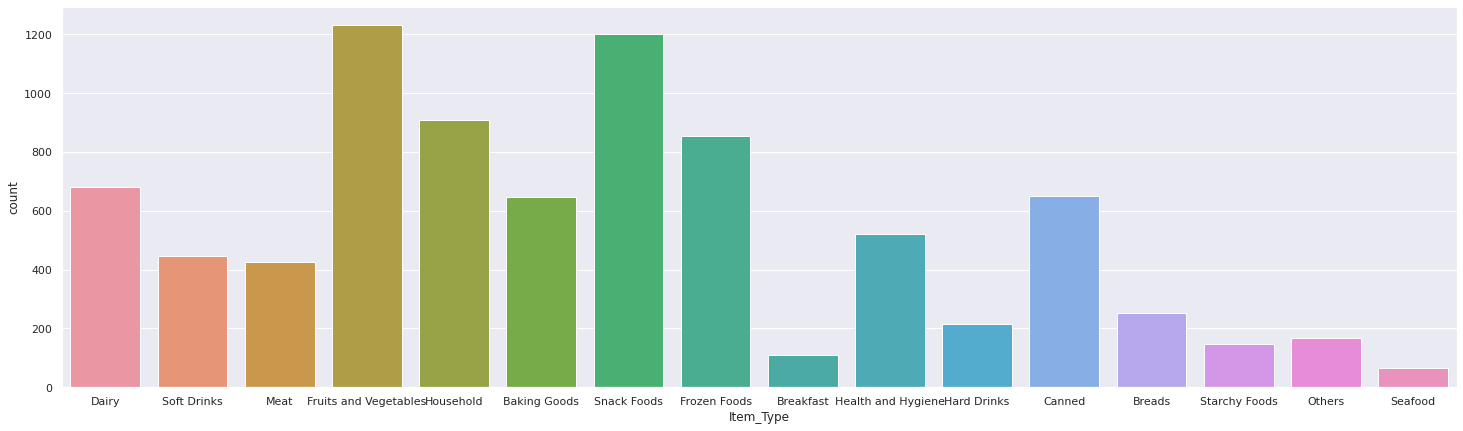

In [24]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=sales_data)
plt.show()

* From the above graph we can observe the different items or food types we have such as dairy, soft drinks, meat, fruits & vegetables, household etc 

* Hence totally we have about 16 Item_Type values in this case where we have more values in the fruits & vegetables column and snack foods column

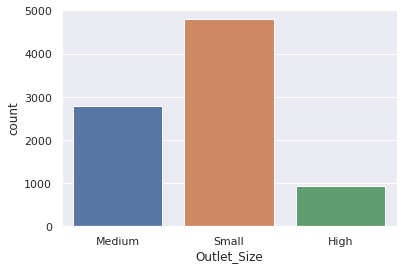

In [25]:
# Outlet_Size column
#plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size', data=sales_data)
plt.show()

* From the above graph, we can observe that we have three outlet_Size in this case which is medium, small & high

**PREPROCESSING OF DATA**

In [26]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
sales_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [29]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Hence, we have successfully cleaned the data in Item_Fat_Content column

**LABEL ENCODING:**
*     Label Encoding refers to the convertion of the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

*     In simple terms, taking all the categorical values & transforming them into some numerical values

In [30]:
encoder = LabelEncoder()

In [31]:
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])

sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])

sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])

sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])

sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])

sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

In [32]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


* Hence, we have only numerical values in our data where these categories are given some specific numerical values if it is unique

* Therefore we have successfully encoded categorical columns into numerical values which is an important data preprocessing step.

**SPLITTING FEATURES AND TARGET INTO X & Y RESPECTIVELY**

We know that the data in the "Item_Outlet_Sales" column is the target & remaining are the features

In [33]:
#Let's have all the features in X & target in Y
X = sales_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = sales_data['Item_Outlet_Sales']

In [34]:
# X contains features
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [35]:
# Y contains target
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


**SPLITTING THE DATA INTO TRAINING DATA & TESTING DATA**

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


We can observe that

* X contains the original data which is 8523

* X_trains contains 80% of the data which is 6818

* X_test contains 20% of the data which is 1705

**MACHINE LEARNING MODEL**

**SUPERVISED LEARNING:**

*  It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. 

* Basically supervised learning is when we teach or train the machine using data that is well labeled.

* In this particular project, the labels are the target which is more precise.

* In this case the targets are sales amount

**REGRESSION:**

* Regression means predicting a particular value especially continuous value (i.e.sales)

**MACHINE LEARNING MODEL TRAINING - XGBoost Regressor**

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling.

In [38]:
regressor = XGBRegressor()

In [39]:
#fit the model
#Training data is in X_train and the corresponding price value is in the Y_train
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

**EVALUATION**

The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.

**PREDICTION OF THE DATA**

In [40]:
sales_data_prediction = regressor.predict(X_train)

In [41]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(Y_train, sales_data_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.8639680373364909


In [42]:
# prediction on test data
data_prediction = regressor.predict(X_test)

In [43]:
# R squared Value
r2_data = metrics.r2_score(Y_test, data_prediction)

In [44]:
print('R Squared value = ', r2_data)

R Squared value =  0.5233136709735687


**BUILDING A PREDICTIVE SYSTEM**

* Building a predictive system inorder to find the sales for the first product from the dataset

In [45]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)
#input_data_as_numpy_array = np.asarray(input_data)
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#prediction = regressor.predict(input_data_reshaped)
#print(prediction)
#print("The initial value is ",prediction[0])
print("The sales for the first product in the dataset is predicted as ", sales_data_prediction[0])

The sales for the first product in the dataset is predicted as  2282.8953
